# Análise de Dados em Python 
**Professor Responsável:** Antonio Sergio Ferreira Bonato <antonio.bonato@saojudas.br>

# Aula03 - NumPy Básico: Arrays e Processamento Vetorizado
Adaptado do livro [Python para Análise de Dados](https://www.google.com.br/books/edition/Python_para_an%C3%A1lise_de_dados/Oj5FDwAAQBAJ?hl=pt-BR&gbpv=0), de Wes McKinney, editora Novatec. [Clique para acessar os notebooks do livro](https://github.com/wesm/pydata-book)

**Conteúdo:**
- O que é NumPy; NumPy arrays; operações com arrays
- NumPy: matrizes e operações com matrizes
- NumPy: carregando dados com NumPy
- NumPy: álgebra linear básica

## Introdução
O NumPy, abreviatura de Numerical Python, é um dos pacotes básicos mais importantes para processamento numérico em Python. A maioria dos pacotes de processamento com funcionalidades científicas utiliza objetos array do NumPy como *língua franca* para troca de dados.

Alguns recursos do NumPy:
- ndarray: um multidimensional eficaz que oferece operações aritméticas rápidas,  orientadas a arrays, e recursos flexíveis de *broadcasting*;
- funções matemáticas para operações rápidas em arrays de dados inteiros sem que seja necessário escrever laços;
- ferramentas para ler/escrever dados de array em disco e trabalhar arquivos mapeados em memória;
- recursos para álgebra linear, geração de números aleatórios e transformadas de Fourier;
- uma API C para conectar o NumPy a bibliotecas escritas em C, C++ ou FORTRAN.

Embora o NumPy por si só não ofereça funcionalidades científicas nem de modelagem, compreender os arrays NumPy e o processamento orientado a arrays ajudará você a utilizar ferramentas com semântica orientada a arrays, como o [pandas](https://pandas.pydata.org) (análise de dados), o [Scikit-Learn](https://scikit-learn.org/stable/) (machine learning) e o [Keras](https://keras.io) (deep learning).

Um dos motivos para o NumPy ser tão importante é o fato de ele ter sido projetado para ser eficaz em arrays de dados grandes.<br>
Veja abaixo um exemplo de desempenho no processamento de uma lista com um milhão de inteiros e um numpy array com um milhão de inteiros.

In [ ]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
#configura o notebook para arredondar os números para 4 casas decimais e não usar notação científica
np.set_printoptions(precision=4, suppress=True)

In [ ]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [ ]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Os algoritmos baseados no NumPy geralmente são de 10 a 100 vezes mais rápidos do que suas contrapartidas em Python puro, além de utilizarem sigificativamente menos memória.

## O ndarray do NumPy: Um Objeto Array Multidimensional
<br>
Um dos principais recursos do NumPy é o seu objeto array n-dimensional, ou ndarray, que é um contêiner rápido e flexível para conjuntos de dados grandes em Python. Os arrays permitem realizar operações matemáticas em blocos inteiros de dados usando uma sintaxe semelhante às operações equivalentes entre elementos escalares. Veja o exemplo:

In [ ]:
import numpy as np
# Gera alguns dados aleatórios
data = np.random.randn(2, 3)
data

In [ ]:
print(data * 10)
print(data + data)

No primeiro exemplo, todos os elementos foram multiplicados por 10. No segundo, os valores de cada posição do array foram somados uns aos outros.

Um ndarray é um contêiner genérico, multidimensional para dados homogêneos; isso significa que todos os elementos devem ser do mesmo tipo. Todo array tem um *shape*, uma tupla que indica o tamanho de cada dimensão, e um *dtype*, que é um objeto que descreve o tipo de dado do array.

In [ ]:
print(data.shape)
print(data.dtype)

**A partir de agora este notebook irá usar np para se referir ao NumPy. Esta é uma convenção comum no mundo Python.**

### Criando ndarrays

O modo mais fácil é usar a função `array`. Ela aceita qualquer objeto do tipo sequência (incluindo outros arrays) e gera um novo numpy array. O exemplo abaixo usa uma lista.

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

Sequências aninhadas geram um array multidimensional.

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

Como *data2* era uma lista de listas, o array NumPy *arr2* tem duas dimensões com o formato inferido a partir dos dados. Podemos conferir isso inspecionando os atributos `ndim` e `shape`.

In [ ]:
print(arr2.ndim)
print(arr2.shape)

A menos que esteja explicitamente especificado, `np.array` tentará inferir um bom tipo de dados para o array que irá criar.

In [ ]:
arr1.dtype

In [ ]:
arr2.dtype

Há outras formas de se criar arrays. A função `zeros` cria array de 0s. A `ones` cria arrays de 1s. Ambas aceitam como argumento o tamanho do array. Para arrays multimensionais, passe uma tupla. A função `empty` cria um array sem inicializar os seus valores (vem zeros, mas às vezes, lixo). A função `arange` é uma versão da função `range`.

In [ ]:
np.zeros(10)

In [ ]:
np.ones((3, 6))

In [ ]:
np.empty((2, 3, 2))

`arange` é uma função embutida `range` de Python.

In [ ]:
np.arange(10)

|Função|Descrição|
|:-|:-|
|array|Converte os dados de entrada (lista, tupla, array ou outro tipo de sequência) em um ndarray, seja inferindo um dtype ou especificando-o explicitamente; copia os dados de entrada, por padrão|
|asarray|Converte a entrada para um ndarray, mas não copia se a entrada for um ndarray|
|arange|Como a função embutida `range`, porém devolve um ndarray em vez de uma lista|
|ones, ones_like|Gera um array somente com 1s, com o formato e dtype especificados; ones_like aceita outro array e gera um array de uns com o mesmo formato e o mesto dtype|
|zeros,zeros_like|Como ones e ones_like, porém gerando arrays com 0s|
|empty, empty_like|Cria novos arrays alocando nova memória, mas não preenche nehum valor|
|full, full_like|Gera um array com o formato e o dtype especificados, com todos os valores preenchidos com o valor de preenchimento indicado. full_like aceita outro array e gera um array preenchido com o mesmo formato e o mestmo dtype|
|eye, identity|Cria uma matriz-identidade quadrada N x N (1s na diagonal e 0s nas demais posições)|

## Quizz

Crie os seguintes arrays:
- um array nulo de tamanho 10
- um array vazio de tamanho 10
- um array de 0 a 10
- uma matriz identidade de tamanho 3

In [ ]:
#resposta

### Tipos de dados para  ndarrays
O *tipo de dado* ou *dtype* é um objeto especial contendo informações que o array precisa para interpretar uma posição de memória como um tipo de dado em particular.

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [ ]:
arr1.dtype

In [ ]:
arr2.dtype

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

In [ ]:
np.arange(-5,6, dtype=np.int8)

In [ ]:
np.arange(-5,6, dtype=np.uint8)

|Tipo|Código do Tipo|Descrição|
|:-|:-|:-|
|int8, uint8|i1, u1|Tipos inteiros de 8 bits (1 byte) com e sem sinal|
|int16, uint116|i2, u2|Tipos inteiros de 16 bits com e sem sinal|
|int32, uint32|i4, u4|Tipos inteiros de 32 bits com e sem sinal|
|int64, uint64|i8, u8|Tipos inteiros de 64 bits com e sem sinal|
|float16|f2|Ponto flutuante com metade da precisão|
|float32|f4 ou f|Ponto flutuante padrão de precisão única; compatível com o float de C|
|float64|f8 ou d|Ponto flutuante padrão de precisão dupla; compatível com o double de C e o objeto float de Python|
|float128|f16 ou g|Ponto flutuante com precisão estendida|
|complex64, complex128, complex256|c8, c16, c32|Números complexos representados por dois floats de 32, 64 ou 128 bits respectivamente|
|bool|?|Tipo booleano que armazena os valores True e False|
|object|o|Tipo objeto de Python; um valor pode ser qualquer objeto de Python|
|string_|S|Tipo string ASCII de tamanho fixo (1 byte por caractere); por exemplo, para criar um dtype string com tamanho 10 use 'S10'|
|unicode_|U|Tipo Unicode de tamanho fixo (número de bytes é específico de cada plataforma); a mesma semântiva de especificação de string_ (por exemplo, 'U10')

Você pode conveter explicitamente ou fazer cast de um array de um dtype para outro usando o método `astype` de ndarray:

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

In [ ]:
#cast de ponto flutuante para inteiro trunca a parte decimal
arr.astype(np.int32)

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

Um array de strings que representem números pode ser convertido para um dtype numérico. Mas é preciso cuidado pois pode dar erro se não for possível converter.

In [ ]:
numeric_strings.astype(float)

In [ ]:
not_so_numeric_strings = np.array(['1.25', '-9.6', 'abc'], dtype=np.string_)
not_so_numeric_strings

In [ ]:
try:
    not_so_numeric_strings.astype(float)
except ValueError as ve:
    print(ve)

Você pode usar o atributo dtype de outro array para fazer a conversão.

In [ ]:
int_array = np.arange(10)
int_array

In [ ]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
calibers

In [ ]:
int_array.astype(calibers.dtype)

Também é possível usar os códigos de tipo (veja tabela acima) para fazer a conversão.

In [ ]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

## Quizz

- crie uma matriz identidade de tamanho 5 e transforme em uma matriz de booleans

In [ ]:
#resposta

### Aritmética com NumPy Arrays
Os arrays são importantes pois permitem operações em lote sobre arrays sem a necessidade de loops, o que é conhecido por *vetorização*.

Qualquer operação aritmética entre arrays do mesmo tamanho faz com ela seja aplicada em todos os elementos do array.

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

In [ ]:
arr * arr

In [ ]:
arr - arr

As operações aritméticas com escalares fazem o argumento escalar ser propagado para cada elemento do array.

In [ ]:
1 / arr

In [ ]:
arr ** 0.5

As comparações entre arrays de mesmo tamanho resultam em arrays booleanos.

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

In [ ]:
arr

In [ ]:
arr2 > arr

As operações entre arrays de tamanhos distintos são chamadas de *broadcasting*. A forma mais simples de *broadcasting* acontece em operações entre arrays e escalares. As demais formas tem regras complicadas que não cabem em uma aula introdutória.

## Quiz

Considere a lista [[1,2,4],[4,5,6], [7,8,9]].
- crie um array
- eleve ao quadrado
- multiplique o array por ele elevado ao quadrado
- subtraia 10 do resultado

In [ ]:
#resposta

### Indexação básica e fatiamento

Nos arrays unidimensionais a indexação/fatiamento se comportam como em uma lista.

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr[5]

In [ ]:
arr[5:8]

In [ ]:
arr[5:8] = 12
arr

Se você atribuir um valor a uma fatia este será propagado (*broadcast*) a todos os elemento da fatia.

In [ ]:
arr_slice = arr[5:8]
arr_slice

As fatias de arrays são visualizações (*views*). Uma alteração em uma fatia causa mudanças no array original.

In [ ]:
arr_slice[1] = 12345
arr

A fatia "nua" fará a atribuição a todos os valores em um array.

In [ ]:
arr_slice[:] = 64
arr_slice

Se você quiser uma cópia de uma fatia de um array use `arr[5:8].copy`

Com arrays de várias dimensões a indexação é diferente. Em um array bidimensional, por exemplo, os elementos em cada índice não são mais escalares, mas são arrays unidimensionais.

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

In [ ]:
arr2d[2][0]

A notação abaixo é equivalente à de cima, mas bem mais simples.

In [ ]:
arr2d[2, 0]

Veja a figura, que representa uma ilustração de um array bidimensional. Pensar no eixo 0 (*axis 0*) como as linhas do array e no eixo 1 como as colunas ajuda na compreensão.

![array.png](https://www.oreilly.com/library/view/python-for-data/9781449323592/httpatomoreillycomsourceoreillyimages2172112.png)

Em arrays multidimensionais, se você omitir os índices finais, o objeto retornado será um ndarray de dimensões menores, constituído de todos os dados das dimensões mais altas. Assim, no array arr3d 2 × 2 × 3

In [ ]:
[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

In [ ]:
arr3d.shape

`arr3d[0]` é um array 2 x 3

In [ ]:
arr3d[0]

Tanto valores escalares quanto arrays podem ser atribuídos a arr3d[0]:

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

In [ ]:
old_values

In [ ]:
arr3d[0] = old_values
arr3d

Da mesma forma, arr3d[1, 0] fornece todos os valores cujos índices começam com (1, 0), formando um array unidimensional:

In [ ]:
arr3d[1, 0]

Essa expressão é equivalente a uma indexação em dois passos:

In [ ]:
x = arr3d[1]
x

In [ ]:
x[0]

## Quizz

- crie um vetor 3 x 3 com uma sequência de números
- retorne a primeira linha
- retorne os dois últimos elementos das duas últimas linhas
- retorne a primeira coluna
- preencha a segunda linha com 0s
- preencha a segunda coluna com 1s

In [ ]:
#resposta

#### Indexando com fatias
Assim como objetos unidimensionais, como listas Python, os ndarrays podem ser fatiados usando a sintaxe conhecida:

In [ ]:
arr

In [ ]:
arr[1:6]

Objetos multidimensionais oferecem mais opções, pois você pode fatiar um ou mais eixos e também misturar números inteiros. Considere o array 2D acima, arr2d. Fatiar esse array é um pouco diferente:

In [ ]:
arr2d

In [ ]:
arr2d[:2]

Como você pode ver, ele cortou ao longo do eixo 0, o primeiro eixo. Uma fatia, portanto, seleciona um intervalo de elementos ao longo de um eixo. Você pode passar várias fatias, assim como você pode passar vários índices:

In [ ]:
arr2d[:2, 1:]

Ao fatiar dessa maneira, você sempre obtém visualizações do array com o mesmo número de dimensões. Ao misturar índices inteiros e fatias, você obtém fatias de dimensões menores.

Por exemplo, podemos selecionar a segunda linha, mas somente as duas primeiras colunas, assim:

In [ ]:
arr2d[1, :2]

De modo semelhante, podemos selecionar a terceira coluna, mas somente as duas primeiras linhas, da seguinte maneira:

In [ ]:
arr2d[:2, 2]

Os dois-pontos sozinhos significam que todo o eixo deve ser considerado, portanto podemos fatiar somente os eixos de dimensões mais altas fazendo o seguinte:

In [ ]:
arr2d[:, :1]

Lembrando que uma atribuição a uma fatia faz a atribuição para toda a seleção.

In [ ]:
arr2d[:2, 1:] = 0
arr2d

Fatiamento de arrays bidimensionais

![array2dslicing.png](https://i0.wp.com/www.datasciencelearner.com/wp-content/uploads/2019/01/indexing-and-slicing-of-arrays.png?w=762&ssl=1)

In [ ]:
vet2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(vet2d)
vet1 = vet2d[1,:2]
print(vet1)
print(vet1.shape, vet1.ndim)
vet2 = vet2d[1:2,:2]
print(vet2)
print(vet2.shape, vet2.ndim)

### Indexação booleana
Vamos considerar um exemplo em que temos alguns dados em uma matriz e uma matriz de nomes com duplicatas. Vamos usar aqui a função `randn` de `numpy.random` para gerar alguns dados aleatórios normalmente distribuídos:

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)
print(names.shape, data.shape)

Suponha que cada nome corresponda a uma linha no array de dados e que desejássemos selecionar todas as linhas com o nome correspondente 'Bob'. Como operações aritméticas, comparações (como ==) com array também são vetorizadas. Assim, comparar nomes com a string 'Bob' gera um array booleano:

In [ ]:
names == 'Bob'

Esse array booleano pode ser passado quando o array é indexado:

In [ ]:
data[names == 'Bob']

O array booleano deve ter o mesmo comprimento que o eixo que está indexando. Você pode até misturar e combinar arrays booleanos com fatias ou números inteiros

In [ ]:
data[names == 'Bob', 2:]

In [ ]:
data[names == 'Bob', 3]

Abaixo, selecionando tudo exceto Bob.

In [ ]:
names != 'Bob'

O operador `~` é o operador lógico de negação em NumPy

In [ ]:
data[~(names == 'Bob')] 

In [ ]:
cond = names == 'Bob'
print(cond)
data[~cond]

Você também pode usar os operadores lógicos `&` (e) e `|` (ou).

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask

In [ ]:
data[mask]

In [ ]:
print(names)
print(data)

Selecionar dados de um array com indexação booleana **sempre** cria uma cópia dos dados.

In [ ]:
data[data < 0] = 0
data

In [ ]:
data[names != 'Joe'] = 7
data

## Quizz

- crie um array 3 x 3 com números aleatórios
- encontre o número do meio (linha 1 e coluna 1)
- retorne um array unidimensional com todos os números menores que o do meio

In [ ]:
#resposta

### Indexação sofisticada

A inedexação sofisticada (*fancy*) sempre cria cópia dos dados.

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

In [ ]:
# selecionando linhas em ordem determinada
arr[[4, 3, 0, 6]]

In [ ]:
# parecido, mas de trás para frente
arr[[-3, -5, -7]]

In [ ]:
np.arange(32)

O método `reshape` muda as dimensões do array.

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

No caso acima, os elementos (1,0), (5,3), (7,1) e (2,2) foram selecionados. Independentemente de quantas dimensões o array tiver, o resultado da indexação sofisticada sempre será unidimensional.

Agora, se o que você quer é uma região retangular formada pela seleção de um subconjunto de linhas e colunas da matriz, faça como abaixo:

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

### Transposição de  arrays e troca de eixos

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

##### Transposta da matriz

Veja [este gif](https://network.grupoabril.com.br/wp-content/uploads/sites/4/2016/12/transpor-matrizes.gif) para entender como transpor uma matriz.

In [ ]:
arr.T

In [ ]:
arr = np.random.randn(6, 3)
arr

##### Multiplicação de matrizes

Dúvidas sobre a multiplicação de matrizes? Veja [este gif](https://lh6.googleusercontent.com/KUHK9OI3-lZIoJSSdyHdpM0ZijF469-PE0lYG3DYRJjwOeX-1KmowgU9MIMMgXzam9w-QK6DOY_gePTyOvDBS-Y6ImO2ReaI9k5_fST-gUhXPcGZExrLW-ucRkUhIhTFKgUULc7X).
Mais sobre o assunto [nesta videoaula](https://pt.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/v/matrix-multiplication-intro) na Khan Academy.

In [ ]:
np.dot(arr.T, arr)
# multiplicação matricial de uma matriz 3x6 por matriz 6x3

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr

##### Transposição de arrays com mais dimensões aceitam uma tupla de números para permutá-los.

In [ ]:
arr.transpose((1, 0, 2))

Neste caso, os eixos foram reordenados com o segundo eixo em primeiro lugar, o primeiro eixo em segundo e o último eixo permaneceu inalterado.
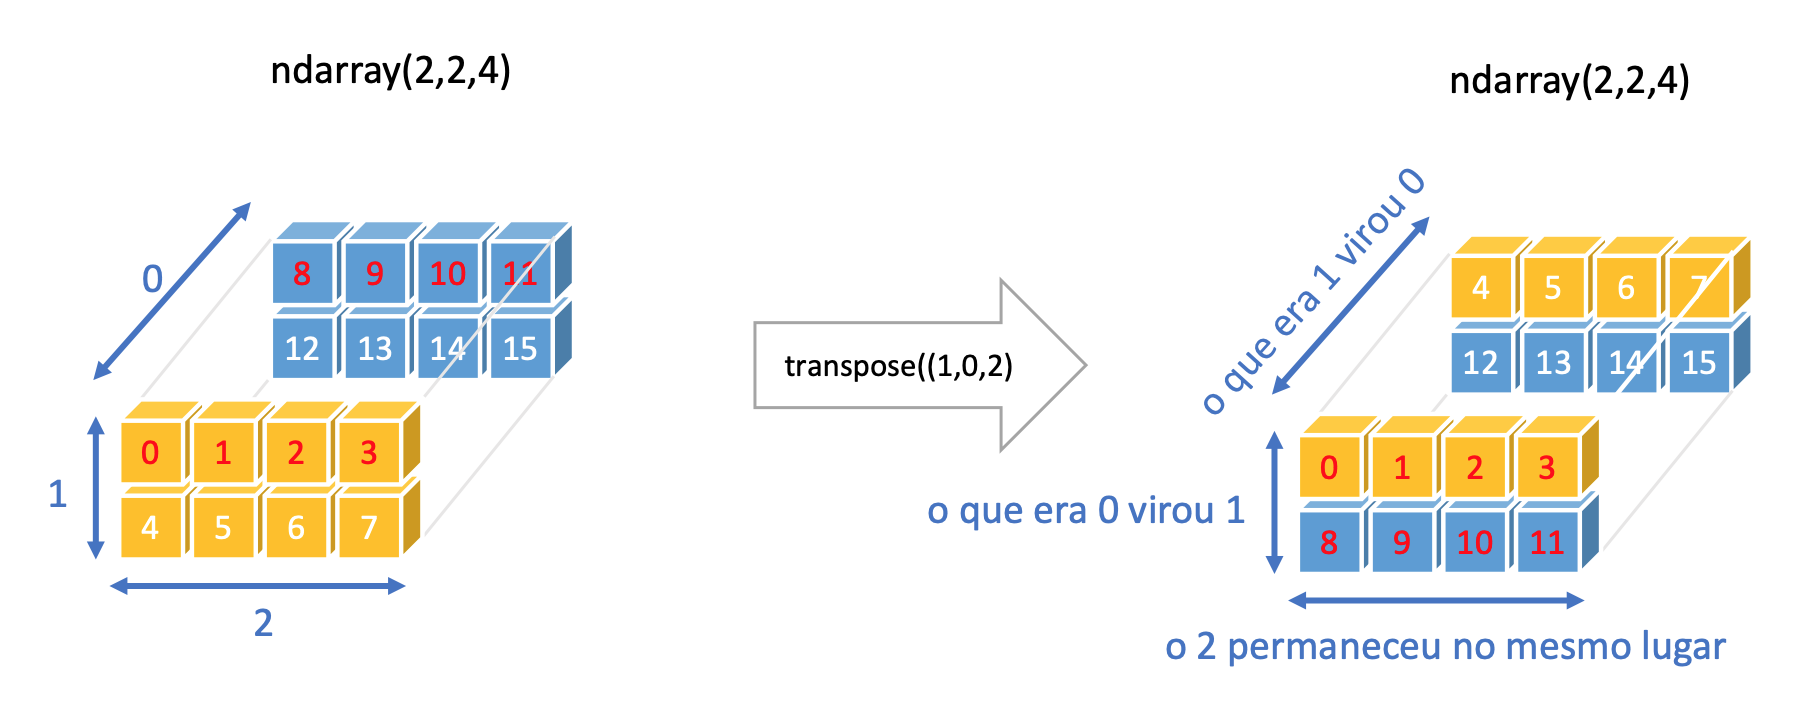

In [ ]:
arr.T

In [ ]:
arr.transpose((2,1,0))

Fazer o transpose(2,1,0) é o mesmo que fazer a transposta da matriz com .T
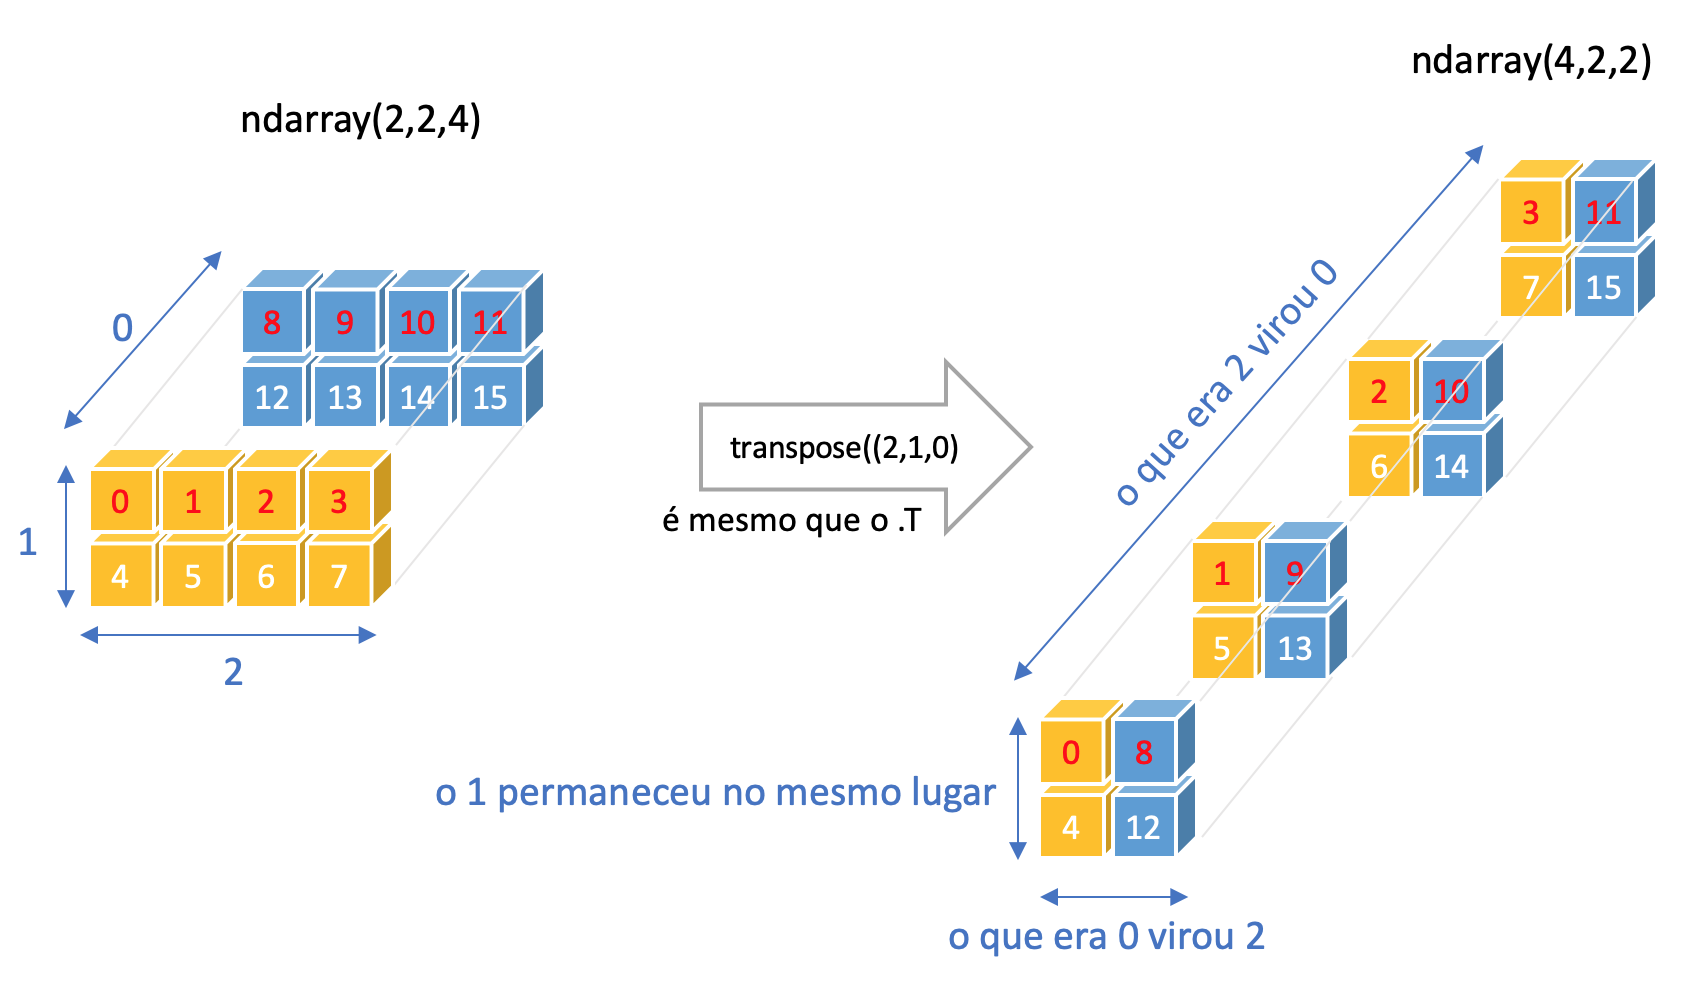

In [ ]:
arr

O método `swapaxes`, que aceita um par de números de eixos, troca os eixos indicados para reorganizar os dados.

In [ ]:
arr.swapaxes(1, 2)

Tanto `swapaxes` quanto `transpose` e `.T` criam visualizações dos dados sem fazer uma cópia.

## Quizz

- crie um array unidimensional de 0 a 11
- transforme em uma matriz 3 x 4

In [ ]:
#resposta

## Funções Universais: funções rápidas de arrays para todos os elementos

Uma função universal, ou ufunc, é uma função que executa operações elementares nos dados nos ndarrays. Você pode considerá-los como invólucros vetorizados rápidos para funções simples que recebem um ou mais valores escalares e produzem um ou mais resultados escalares.

Muitas ufuncs são transformações simples em todos os elementos, como `sqrt` ou `exp`:

In [ ]:
def minha_funcao(x):
    return 2*x

In [ ]:
arr = np.arange(10)
arr
np.sqrt(arr)

In [ ]:
np.exp(arr)

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x

In [ ]:
y

In [ ]:
np.maximum(x, y)

In [ ]:
arr = np.random.randn(7) * 5
arr

In [ ]:
remainder, whole_part = np.modf(arr)
remainder

In [ ]:
whole_part

In [ ]:
(remainder + whole_part) - arr

In [ ]:
arr

In [ ]:
np.sqrt(arr)

In [ ]:
arr

In [ ]:
# as ufuncs aceitam um segundo argumento opcional out que lhes permitem atuar in-place nos arrays
np.sqrt(arr, arr)

In [ ]:
arr = np.sqrt(arr)

In [ ]:
arr

##### Funções Unárias (recebem um argumento)
|Função|Descrição da função|
|:-|:-|
|abs, fabs |Calcula o valor absoluto em termos de elementos para valores inteiros, pontos flutuantes ou complexos. Use fabs como uma alternativa mais rápida para dados de valor não complexo|
|sqrt |Calcula a raiz quadrada de cada elemento. Equivalente a arr ** 0,5|
|square |Calcula o quadrado de cada elemento. Equivalente a arr ** 2|
|exp |Calcula o expoente e\*\*x de cada elemento|
|log, log10, log2, log1p |Logaritmo natural (base e), base de log 10, base de log 2 e log (1 + x), respectivamente|
|sign |Calcula o sinal de cada elemento: 1 (positivo), 0 (zero) ou -1 (negativo)|
|ceil |Calcula o teto de cada elemento, ou seja, o menor número inteiro maior que ou igual a cada elemento|
|floor |Calcula o piso de cada elemento, ou seja, o maior número inteiro menor ou igual a cada elemento|
|rint |Arredonda elementos para o número inteiro mais próximo, preservando o dtype|
|modf |Retorna partes fracionárias e integrais da matriz como uma matriz separada|
|isnan |Retorna matriz booleana indicando se cada valor é NaN (não é um número)|
|isfinite, isinf |Retorna uma matriz booleana indicando se cada elemento é finito (não-inf, não-NaN) ou infinito, respectivamente|
|cos, cosh, sin, sinh, tan, tanh |Funções trigonométricas regulares e hiperbólicas|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh |Funções trigonométricas inversas|
|logic_not |Calcula o valor de verdade de não x em termos de elementos. Equivalente a -arr.|

In [ ]:
arr

In [ ]:
np.isnan(arr)

In [ ]:
np.isfinite(arr)

##### Funções Binárias (recebem dois argumentos)
|Função|Descrição da função|
|:-|:-|
|add |Adiciona elementos correspondentes em matrizes|
|subtract |Subtrai elementos na segunda matriz da primeira matriz|
|multiply |Multiplica elementos da matriz|
|divide, floor_divide |Divide ou divide pelo piso (truncando o resto)|
|power |Eleva os elementos no primeiro array às potências indicadas no segundo array|
|maximum, fmax |Máximo para todos os elementos. fmax ignora NaN|
|minimum, fmin |Mínimo para todos os elementos. fmin ignora NaN|
|mod |Módulo para todos os elementos (restante da divisão)|
|copysign |Copia o sinal dos valores do segundo argumento para valores do primeiro argumento|
|greater, greater_equal, less, less_equal, equal, not_equal |Executa uma comparação entre elementos, produzindo uma matriz booleana. Equivalente a operadores infixos >,>=, <, <=, ==,!=|
|logical_and, logical_or, logical_xor |Calcule o valor de verdade em termos de elementos da operação lógica. Equivalente a operadores infixos &, \|, ^|

In [ ]:
np.logical_xor(True,False)

## Quizz

- crie um array unidimensional de 1 a 12
- transforme em uma matriz 3 x 4
- calcule o log na base 10 da matriz
- pegue somente a parte fracionária e multiplique por 1000
- pegue agora somente a parte inteira
- a partir desta matriz gere uma outra booleana com True onde o número for par e False onde for ímpar

In [ ]:
# resposta

## Programação orientada a arrays
O uso de arrays NumPy permite que você expresse muitos tipos de tarefas de processamento de dados como expressões concisas de arrays que, de outra forma, poderiam exigir s escrita de loops. Essa prática de substituir loops explícitos por expressões de array é comumente referida como vetorização. Em geral, as operações vetorizadas de arrays com frequência são uma ou duas (ou mais) ordens de magnitude mais rápidas que seus equivalentes puros em Python, com o maior impacto em qualquer tipo de cálculo numérico. 

Como um exemplo simples, suponha que desejássemos avaliar a função $$\sqrt{x^2 + y^2}$$ através de uma grade regular de valores. A função `np.meshgrid` pega duas matrizes 1D e produz duas matrizes 2D correspondentes a todos os pares de (x, y) nos dois arrays:

In [ ]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
points

In [ ]:
xs, ys = np.meshgrid(points, points)

In [ ]:
xs

In [ ]:
ys

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

In [ ]:
plt.close('all')

### Expressando uma lógica condicional como operações de array

A função `numpy.where` é uma versão vetorizada da expressão ternária `x if condição else y`. Suponha que tivéssemos um aray booleano e dois arrays de valores:

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suponha que desejássemos pegar um valor de xarr sempre que o valor correspondente em cond for True, caso contrário, pegar o valor de yarr. Uma compreensão de lista fazendo isso pode ser semelhante a:

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

Isso tem vários problemas. Primeiro, não será muito rápido para arrays grandes (porque todo o trabalho está sendo feito em Python puro). Em segundo lugar, ele não funcionará com matrizes multidimensionais. Com o `np.where`, você pode escrever isso de forma muito concisa:

In [ ]:
result = np.where(cond, xarr, yarr)
result

O segundo e o terceiro argumentos para `np.where` não precisam ser arrays; um ou ambos podem ser escalares. Um uso típico de `where` na análise de dados é produzir um novo array de valores com base em outro array. Suponha que você tenha um array de dados gerados aleatoriamente e deseje substituir todos os valores positivos por 2 e todos os valores negativos por -2. Isso é muito fácil de fazer com o `np.where`:

In [ ]:
arr = np.random.randn(4, 4)
arr

In [ ]:
np.where(arr > 0, 2, -2)

In [ ]:
np.where(arr > 0, 2, arr) # substituir apenas os valores positivos por 2

Os arrays passados para `where` podem ser mais do que apenas arrays de tamanhos iguais ou escalares.

Por exemplo, você pode usar `where` para expressar uma lógica mais complicada; considere este exemplo em que temos dois arrays booleanos, cond1 e cond2, e desejamos atribuir um valor diferente para cada um dos 4 pares possíveis de valores booleanos:

In [ ]:
cond1 = np.array([True, False, True,  True, False, True,  False, True,  True,  False])
cond2 = np.array([True, False, False, True, True,  False, True,  True,  False, False])
result = []
for i in range(len(cond1)):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
result

Este loop pode ser convertido em um `np.where` aninhado:

In [ ]:
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

Neste exemplo em particular, também podemos tirar proveito do fato de que os valores booleanos são tratados como 0 ou 1 nos cálculos, portanto, isso pode ser expresso (embora um pouco mais enigmaticamente) como uma operação aritmética:

In [ ]:
result = 1 * (cond1 & ~cond2) + 2 * (cond2 & ~cond1) + 3 * ~(cond1 | cond2)
result

## Quizz

- crie um array unidimensional de 1 a 12
- transforme em uma matriz 3 x 4
- a partir desta matriz gere uma outra booleana com True onde o número for par e False onde for ímpar

In [ ]:
# resposta

### Métodos matemáticos e estatísticos

Um conjunto de funções matemáticas que calcula estatísticas sobre todo um array ou sobre os dados ao longo de um eixo são acessíveis como métodos de array. Agregações (geralmente chamadas de reduções) como sum, mean e desvio padrão std podem ser usadas chamando o método de instância do array ou usando a funções NumPy de nível superior.
Faça um curso de [Probabilidade e Estatística](https://pt.khanacademy.org/math/statistics-probability) na Khan Academy!

In [ ]:
#arr = np.array([[1,1],[2,2]])
arr = np.random.randn(5, 4)
arr

In [ ]:
arr.mean()

In [ ]:
np.mean(arr)

In [ ]:
arr.sum()

Funções como média e soma usam um argumento opcional de eixo que calcula a estatística sobre o eixo especificado, resultando em uma matriz com uma dimensão a menos:

In [ ]:
arr.mean(axis=1)

In [ ]:
# equivalente a
np.array([arr[0].mean(), arr[1].mean(), arr[2].mean(), arr[3].mean(), arr[4].mean()])

In [ ]:
arr.sum(axis=0)

In [ ]:
# equivalente a
np.array([arr[:,0].sum(), arr[:,1].sum(), arr[:,2].sum(), arr[:,3].sum()])

Neste caso, arr.mean(1) significa calcule a média pelas colunas, enquanto arr.sum(0) significa calcule a soma pelas linhas.

Outros métodos, como cumsum e cumprod, não fazem agregações, produzindo um array dos resultados intermediários:

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

Em arrays multidimensionais, funções de acumulação como cumsum devolvem um array de mesmo tamanho, porém com as agregações parciais calculadas ao longo do eixo indicado, de acordo com cada fatia de dimensão menor:

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

In [ ]:
arr.cumsum(axis=0)

In [ ]:
arr.cumprod(axis=1)

|Método|Descrição|
|:-|:-|
|sum |Soma de todos os elementos no array ou ao longo de um eixo. Arrays de comprimento zero possuem soma 0.|
|mean|Média aritmética. Arrays de comprimento zero têm média de NaN.|
|std, var |Desvio padrão e variância, respectivamente, com ajuste opcional dos graus de liberdade (denominador padrão n).|
|min, max |Mínimo e máximo.|
|argmin, argmax |Índices de elementos mínimo e máximo, respectivamente.|
|cumsum|Soma acumulada de elementos a partir de 0|
|cumprod| Produto cumulativo de elementos a partir de 1|

In [ ]:
np.max(arr)

In [ ]:
np.argmax(arr)

## Quizz

- crie uma matriz 10 x 10 de números aleatórios
- calcule a média e o desvio padrão da matriz, das linhas e das colunas

In [ ]:
#resposta

### Métodos para arrays booleanos

Os valores booleanos sofrem coerção para 1 (True) e 0 (False) nos métodos acima. Assim, a soma é frequentemente usada como um meio de contar valores True em um array booleano:

In [ ]:
arr = np.random.randn(100)
(arr > 0).sum() # Número de valores positivos

Há dois métodos, `any` e `all`, úteis para testar valores booleanos. `any` retorna `True` se um ou mais valores são `True`. `all` retorna `True` se todos os valores são `True`.

In [ ]:
bools = np.array([False, False, True, False])
bools.any()

In [ ]:
bools.all()

### Ordenação

Assim como o tipo embutido lista, os arrays NumPy podem ser ordenados in-place com o método `sort`.

In [ ]:
arr = np.random.randn(6)
arr

In [ ]:
arr.sort()
arr

Podemos ordenar cada seção unidimensional de valores em um array multidimensional in-place ao longo de um eixo, passando o número desse eixo para `sort`:

In [ ]:
arr = np.random.randn(5, 3)
arr

In [ ]:
arr.sort(1)
arr

In [ ]:
arr.sort(0)
arr

O método de nível superior `np.sort` devolve uma cópia ordenada de um array, em vez de modificá-lo in-place. Uma forma rápida e fácil de calcular os quantis de um array é ordená-lo e selecionar o valor em uma posição em particular.

In [ ]:
large_arr = np.random.randn(1000)

In [ ]:
np.sort(large_arr)[int(0.05 * len(large_arr))] # 5% quantil

### Unicidade e outras lógicas de conjuntos

O NumPy tem algumas operações básicas de conjuntos para ndarrays unidimensionais. Uma operação comumente utilizada é `np.unique`, que devolve os valores únicos e ordenados de um array:

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [ ]:
# alternativa em Python puro
set(names)

`np.in1d` testa a pertinência dos valores de um array em outro, devolvendo um array booleano.

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

In [ ]:
print(ints)
print(values)

In [ ]:
np.union1d(values, ints)

In [ ]:
np.intersect1d(values, ints)

In [ ]:
np.setdiff1d(values, ints)

In [ ]:
np.setdiff1d(ints, values)

In [ ]:
np.setxor1d(ints, values)

|Método|Descrição|
|:-|:-|
|unique(x)|Calcula os elementos únicos ordenados de x|
|intersect1d(x, y)|Calcula os elementos comuns ordenados em x e y|
|union1d(x, y)|Calcula a união ordenada dos elementos|
|in1d(x, y)|Calcula um array booleano indicando se cada elemento de x está contido em y|
|setdiff1d(x, y)|Diferença entre conjuntos, isto é, elementos em que x que não estão em y|
|setxor1d(x, y)|Diferença simétrica entre conjunto: elementos que estão em apenas um dos arrays, mas não em ambos|

## Entrada e saída de arquivos com arrays

O NumPy é capaz de salvar e carregar dados de e para o disco, seja em formato texto ou em formato binário.

### Arquivos binários
`save` e `load` salvam e carregam dados do array em um disco de foram eficiente.

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
!more some_array.npy

Você pode passar vários arrays em um arquivo não compactado usando `np.savez`, passando os arrays como argumentos nomeados. Ao carregar um arquivo .npz, você irá obter um objeto dicionário que carregará os arrays individuais em modo lazy (preguiçoso).

**Obs:** Em computação, modo *lazy* significa carregar somente o necessário quando for necessário. O contrário é o modo *eager*, que faz tudo com antecedência.

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
dict(arch)

`np.savez_compressed` salva em um arquivo compactado.

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
#del some_array.npy
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

### Arquivos Texto

O mais comun é usar as funções `read_csv` e `read_table` do pandas para carregar arquivos texto. Porém, às vezes será útil carregar dados em arrays NumPy *vanilla*  usando o `np.loadtxt` ou o `np.genfromtxt`, mais especializado.

Essas funções têm muitas opções que permitem especificar delimitadores diferentes, funções de conversor para determinadas colunas, pular linhas e outras coisas. Veja um caso simples de um arquivo separado por vírgula (CSV) como este:

In [ ]:
%%writefile array_ex.txt
0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334

Este arquivo pode ser carregado assim:

In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

`np.savetxt` executa a operação inversa: gravando um array em um arquivo de texto delimitado. O `genfromtxt` é semelhante ao `loadtxt`, mas é voltado para arrays estruturados e tratamento de dados ausentes.

## Álgebra linear

Álgebra linear, como multiplicação de matrizes, decomposições, determinantes e outras matemáticas de matriz quadrada, é uma parte importante de qualquer biblioteca de matrizes. Ao contrário de algumas linguagens como o MATLAB, a multiplicação de duas matrizes bidimensionais por * é um produto em termos de elementos em vez de um produto escalar matricial. Como tal, há uma função `dot`, um método de array e uma função no *namespace* numpy, para multiplicação de matrizes:

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

In [ ]:
y

(2,3)X(3,2)=(2,2)

In [ ]:
x.dot(y)

In [ ]:
np.dot(x, y)

In [ ]:
x @ y

Um produto de matrizes entre um array bidimensional e um array unidimensional de tamanho apropriado resulta em um array unidimensional.

In [ ]:
ones = np.ones(3)
ones

In [ ]:
np.dot(x, ones)

O símbolo `@` também funciona como um operador infixo que efetua uma multiplicação de matrizes.

In [ ]:
x @ ones

`numpy.linalg` tem um conjunto padrão de decomposições de matrizes, além de operações como inverso e determinante.

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

In [ ]:
inv(mat)

In [ ]:
mat.dot(inv(mat))

Em álgebra linear, uma *decomposição QR* (também chamada de fatoração QR) de uma matriz é uma decomposição de uma matriz $A$ em um produto $A=QR$ de uma *matriz ortogonal* $Q$ e uma *matriz triangular superior* $R$. A decomposição QR é usado frequentemente para resolver o problema de mínimos quadrados linear e é a base para um determinado algoritmo de autovalores, o algoritmo QR. Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Decomposição_QR).

In [ ]:
#fatoração QR
q, r = qr(mat)
r

In [ ]:
q

In [ ]:
mat - q@r

A expresão `X.T.dot(X)` calcula o produto escalar de X com sua transposta X.T.

|Função|Descrição|
|:-|:-|
|diag |Retorne os elementos diagonais (ou fora da diagonal) de uma matriz quadrada como uma matriz 1D ou converta uma matriz 1D em uma matriz quadrada com zeros na diagonal fora da diagonal|
|dot|Multiplicação matricial|
|trace |Calcular a soma dos elementos diagonais|
|det |Calcula o determinante da matriz|
|eig |Calcule os autovalores e autovetores de uma matriz quadrada|
|inv |Calcula o inverso de uma matriz quadrada|
|pinv |Calcule o inverso pseudo-inverso de Moore-Penrose de uma matriz|
|qr |Calcular a decomposição QR|
|svd |Calcula a decomposição do valor singular (SVD)|
|solve |Resolva o sistema linear Ax = b para x, onde A é uma matriz quadrada|
|lstsq |Calcule a solução dos mínimos quadrados para Ax = b|

## Geração de números pseudoaleatórios

O módulo numpy.random complementa o `random` interno do Python com funções para gerar eficientemente matrizes inteiras de valores de amostra de muitos tipos de distribuições de probabilidade. Por exemplo, você pode obter um array 4 por 4 de amostras da distribuição normal padrão usando `normal`: 

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

O módulo `random` interno do Python, por outro lado, apenas mostra um valor de cada vez. Como você pode ver neste benchmark, o `numpy.random` é uma ordem de grandeza mais rápido para gerar amostras muito grandes:

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

Chamamos estes números de pseudoaleatórios porque são gerados por um algoritmo com um comportamento determinístico, baseado na semente (seed) do gerador de números aleatórios. Podemos alterar a semente conforme abaixo.

In [ ]:
np.random.seed(42)

Podemos também usar RandomState para configurar para alterar uma semente local sem mudar a semente global.

In [ ]:
rng = np.random.RandomState(42)
rng.randn(10)

|Função|Descrição|
|:-|:-|
|seed |Fornece uma semente ao gerador de números aleatórios|
|permutation |Retorna uma permutação aleatória de uma sequência ou um intervalo permutado|
|shuffle |Permuta aleatoriamente uma sequência in-place|
|rand|Sorteia amostras de uma distribuição uniforme|
|randint |Sorteia números inteiros aleatórios de um dado intervalo|
|randn |Sorteia amostras de uma distribuição normal com média 0 e desvio padrão 1 (interface semelhante ao MATLAB)|
|binomial |Sorteia amostras de uma distribuição binomial|
|normal|Sorteira amostras normais de uma distribuição normal (gaussiana)|
|beta|Sorteia amostras de uma distribuição beta|
|chisquare |Sorteia amostras de uma distribuição qui-quadrada|
|gamma|Sorteia amostras de uma distribuição gama|
|uniform|Sorteia amostras de uma distribuição uniforme [0, 1)|